<a href="https://colab.research.google.com/github/MochalovaDaria/my-progs/blob/main/%D0%97%D0%B0%D0%B4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving test.jpg to test (4).jpg


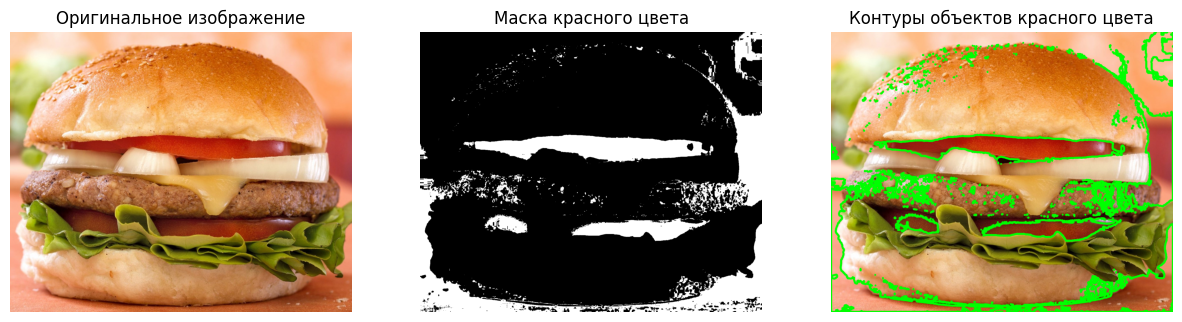

In [8]:
# Импорт необходимых библиотек
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Загрузка изображения
uploaded = files.upload()

# Предполагаем, что загружено только одно изображение
image_path = next(iter(uploaded))
image = cv2.imread(image_path)

# Преобразование изображения в цветовое пространство HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Определение диапазона красного цвета в HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Создание маски для красного цвета
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = mask1 | mask2

# Нахождение контуров на маске
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Рисование контуров на оригинальном изображении
output = image.copy()
cv2.drawContours(output, contours, -1, (0, 255, 0), 7)  # Зеленый цвет для контуров

# Отображение оригинального изображения, маски и изображения с контурами
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Оригинальное изображение')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Маска красного цвета')
plt.imshow(mask, cmap='gray')  # Отображение маски в градациях серого
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Контуры объектов красного цвета')
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()